In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import math
from os import path
from scipy.stats import norm
from pykalman import KalmanFilter
# from sklearn.metrics import mean_squared_error

In [111]:
plt.rc('text', usetex=True)

inpath = "../../"

currentfile = "Imitator_2_2400.csv"

# Read from file
strdatatype = np.dtype([('N', np.int_, (2,)), ('Time_Count', np.int_ ), ('Mode', np.int_ ),
                            ('T', np.float_, (10,)), ('S', np.int_, (10,)), ('System_State', np.bool_ )])
N, Time_Count, Mode, T, S, System_State = np.loadtxt(path.join(inpath, currentfile),
        unpack=True, delimiter=';', skiprows=1, dtype=strdatatype)

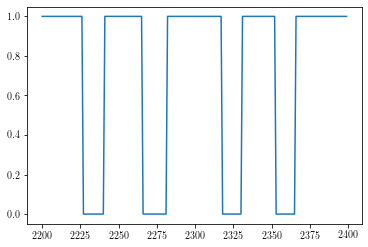

In [112]:
# print(N[:, 1])
# print(S[:, 9])
plt.plot(N[2200:2400, 1], S[2200:2400, 8])
plt.show()

In [113]:
dS = S[1:, :] - S[:-1, :]
arInds = np.ones(1) * 25
for block in range(10):
    indUpS = np.argwhere(dS[:, block] == 1)
    indDownS = np.argwhere(dS[:, block] == -1)
    indDownS = np.reshape(indDownS, len(indDownS))
    arInds = np.append(arInds, indDownS[1:] - indDownS[:-1])
arInds = np.array(arInds)
print(np.shape(arInds))
print(arInds)

(415,)
[ 25.  61.  35.  55.  42.  46.  56.  68.  55.  44.  46.  41.  35.  70.
  75.  78.  48. 121.  50.  42.  31.  42.  52.  50.  55.  44. 160.  27.
  36.  89.  64.  24.  32.  45.  48.  48.  75.  98.  64.  40.  38.  27.
  31.  58.  32.  47.  47.  55.  55.  69.  55.  46.  59.  38.  25.  70.
  75.  80.  55. 117.  47.  40.  57.  68.  37.  71.  38. 154.  34.  37.
  78.  69.  31.  30.  45.  47.  60.  64.  98.  62.  41.  51.  36.  67.
  34.  54.  39.  49.  48.  71.  38.  60.  48.  46.  32.  68. 105.  59.
  48. 129.  42.  34.  45.  61.  45.  37.  63.  68. 111.  28.  36. 100.
  48.  31.  33.  38.  51.  60.  64.  96.  63.  42.  51.  35.  65.  45.
  42.  39.  54.  46.  69.  55.  44.  55.  42.  37.  59.  76.  79.  49.
 129.  65.  37.  48.  55.  40.  67.  42. 159.  28.  38.  97.  49.  31.
  33.  42.  47.  63.  66. 104.  52.  41.  38.  28.  64.  42.  32.  54.
  39.  53.  47.  70.  63.  33.  32.  53.  33.  43.  34. 112.  47.  59.
 107.  44.  40.  34.  40.  55.  50.  94. 159.  33.  36. 100.  48.  30.

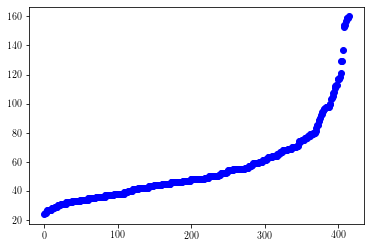

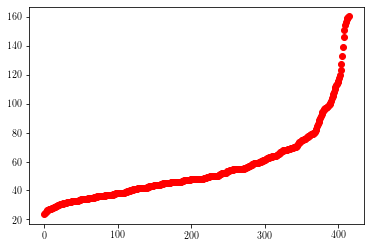

Mean period : 55.26406040540484
Standard deviation : 25.108076830772404


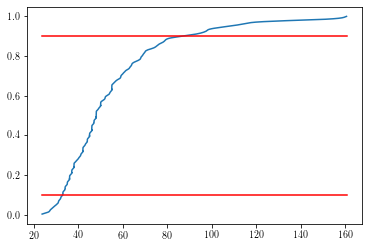

In [115]:
arPeriods = arInds
arPeriods = np.reshape(arPeriods, len(arPeriods))
    
#     noise = np.random.normal(0., 15., len(arPeriods))
#     plt.plot(arPeriods + noise, 'bo')
arPeriods = np.sort(arPeriods, axis=0)
plt.plot(arPeriods, 'bo')
plt.show()

kalmanS = np.zeros(len(arPeriods))
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(arPeriods).smooth(arPeriods)[0]
kalmanS = states_pred[:, 0]

# print(kalmanT)

plt.plot(kalmanS, 'ro')
plt.show()
arPeriods = kalmanS

#     print(np.shape(arPeriods))

prob = np.zeros(len(arPeriods), dtype=int)
for index in range(len(arPeriods)):
    p = arPeriods[index]
    prob[index] = np.count_nonzero(arPeriods[:index+1] <= p)

prob = prob / np.max(prob)
mean = np.mean(arPeriods)
arMean = np.ones(len(arPeriods)) * mean
low = np.ones(len(arPeriods)) * .1
high = np.ones(len(arPeriods)) * .9
mse = np.sqrt(np.sum((arMean - arPeriods) ** 2) / (len(arPeriods) - 1))
#     print('Mean period [' + repr(block) + ']: ' + repr(mean))
#     print('Standard deviation [' + repr(block) + ']: ' + repr(mse))
    
print('Mean period : ' + repr(mean))
print('Standard deviation : ' + repr(mse))

kalmanP = np.zeros(len(prob))
kf = KalmanFilter(transition_matrices=np.array([[1, .1], [0, 1]]),transition_covariance=0.1 * np.eye(2))
states_pred = kf.em(prob).smooth(prob)[0]
kalmanP = states_pred[:, 0]

# plt.plot(arPeriods, np.clip(prob, .1, .9))
plt.plot(arPeriods, prob)
plt.plot(arPeriods, low, 'r-')
plt.plot(arPeriods, high, 'r-')
plt.show()